In [1]:
import pandas as pd
df = pd.read_csv('phytophthora_PaDEL.csv')
df

C:\Users\lglv\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,CID,MIC(M),pMIC,EM,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CompoundCID00021,0.000191,3.717873,Brc1cc2c([nH]c3c(C)nccc23)cc1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CompoundCID00001,0.000171,3.768176,Brc1cc2[nH]cc(-c3nc(C)sc3)c2cc1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CompoundCID15910,0.000188,3.725771,Clc1c(Cl)c(C#N)c(Cl)c(C#N)c1Cl,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CompoundCID6439292,0.000108,3.967397,O=C(N)C([C@H](O)/C(=C\C=C/C=C/Cc1ocnc1)/C)(C)C,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CompoundCID132576379,0.000142,3.847010,Clc1c2c(C/C=C(\C)/C)cccc2[nH]c1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,CompoundCID00007,0.000145,3.839385,O=C1N2C(c3sc(C)cc3)Nc3c(cccc3)C2=Nc2c1cccc2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,CompoundCID00024,0.000240,3.620436,Clc1ccc(C=2C(=O)O[C@H](C)C=2)cc1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161,CompoundCID445154,0.000070,4.154285,Oc1cc(O)cc(/C=C/c2ccc(O)cc2)c1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162,CompoundCID9797226,0.000003,5.508337,O=C(OC/C(=C/Cc1c(O)c(C(=O)C(C)C)c(O)cc1O)/C)C,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
X = df.iloc[:,4:]
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = df['pMIC']
y

0      3.717873
1      3.768176
2      3.725771
3      3.967397
4      3.847010
         ...   
159    3.839385
160    3.620436
161    4.154285
162    5.508337
163    5.104366
Name: pMIC, Length: 164, dtype: float64

# Finding constant features

(164, 881) (164,)
>Threshold=0.00, Features=478
>Threshold=0.03, Features=369
>Threshold=0.05, Features=330
>Threshold=0.08, Features=300
>Threshold=0.10, Features=244
>Threshold=0.12, Features=200
>Threshold=0.15, Features=168
>Threshold=0.18, Features=146


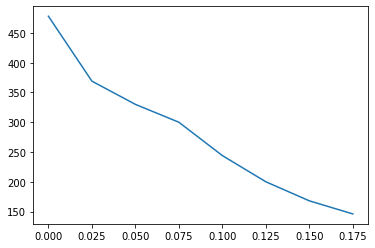

In [4]:
# explore the effect of the variance thresholds on the number of selected features
%matplotlib inline
from numpy import arange
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.20, 0.025)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.0):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X_thres = remove_low_variance(X, threshold=0.0)
X_thres.shape

(164, 478)

In [6]:
# lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_thres, y, test_size = 0.20, random_state = 10)

print("The Shape of X train:", X_train.shape)
print("The Shape of X test:", X_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of X train: (131, 478)
The Shape of X test: (33, 478)
The Shape of y train: (131,)
The Shape of y test: (33,)


# Training 7 regression models

In [7]:
# from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [8]:
# lets create a Predictive Models

model_accuracy = pd.DataFrame(columns=['Model'])
models = {
    "KNR" : KNeighborsRegressor(),
    "DTR" : DecisionTreeRegressor(),
    "RFR" : RandomForestRegressor(),
    'BR' : BaggingRegressor(),
    'GBR' : GradientBoostingRegressor(),
    'ABR' : AdaBoostRegressor(),
    'XGB' : XGBRegressor()
          }

for abrev, model in models.items():
    
    model.fit(X_train, y_train)
    
    score = model.score(X_train, y_train) # Training score
    scores = cross_val_score(model, X_train, y_train, cv=10)
    kfold = KFold(n_splits=10, shuffle=True)
    kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold ) # kfold CV score
    
    y_pred = model.predict(X_test)
    X_train_pred = model.predict(X_train)
    
    train_MAE_acc = mean_absolute_error(y_train, X_train_pred)
    train_MSE_acc = mean_squared_error(y_train, X_train_pred)
    train_r2_acc = r2_score(y_train, X_train_pred)
    pred_accurasy_MAE = mean_absolute_error(y_test, y_pred)
    pred_accurasy_MSE = mean_squared_error(y_test, y_pred)
    pred_accurasy_R2 = r2_score(y_test, y_pred) # Accurasy score
    print('Model:', abrev)
    print("Training score: ", score)
    print('Accuracy_r2', pred_accurasy_R2)
    print('MAE', pred_accurasy_MAE)
    print('MSE', pred_accurasy_MSE, '\n')
    print('********************************************')
    
    '''# print("Mean cross-validation score: %.2f" % scores.mean())
    print("\n", abrev + ' scores')
    print("Training score: ", score)
    print("Mean cross-validation score: %.2f" % scores.mean())
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())'''
    
     
    '''model_accuracy = model_accuracy.append({
        'Model': abrev, 
        #'Accuracy_MAE': pred_accurasy_MAE,
        #'Accuracy_MSE': pred_accurasy_MSE,
        'Accuracy_r2': pred_accurasy_R2,
        'Training_scores': score,
        #'Train_MAE_acc': train_MAE_acc,
        #'Train_MSE_acc': train_MSE_acc,
        #'Train_r2_acc': pred_accurasy_R2}, 
        ignore_index=True)'''
    model_accuracy = model_accuracy.append({
        'Model': abrev, 
        'Accuracy_r2': pred_accurasy_R2,
        'MAE': pred_accurasy_MAE,
        'MSE': pred_accurasy_MSE,
        'CV_score': scores.mean(),
        'Kfold_CV': kf_cv_scores.mean(),
        'Training_scores': score,
    'Train_r2_acc': train_r2_acc},ignore_index=True)

Model: KNR
Training score:  0.6639961160286436
Accuracy_r2 0.6323989193864856
MAE 0.5575720069090908
MSE 0.59297102377836 

********************************************
Model: DTR
Training score:  0.9886918220041168
Accuracy_r2 0.8690716237175818
MAE 0.2962961712121211
MSE 0.2111983272634853 

********************************************
Model: RFR
Training score:  0.934361702422497
Accuracy_r2 0.8739301033604883
MAE 0.3350583461208801
MSE 0.203361196744031 

********************************************
Model: BR
Training score:  0.9098600150934779
Accuracy_r2 0.8616599372469075
MAE 0.347863824660101
MSE 0.22315399210294934 

********************************************
Model: GBR
Training score:  0.9532391674504141
Accuracy_r2 0.8689830991117278
MAE 0.35211020376761465
MSE 0.21134112479301162 

********************************************
Model: ABR
Training score:  0.7851650778464864
Accuracy_r2 0.7074197830782567
MAE 0.5989970327201013
MSE 0.4719561500630762 

**********************

In [9]:
model_accuracy.sort_values(ascending=False, by = 'Accuracy_r2')

,Model,Accuracy_r2,CV_score,Kfold_CV,MAE,MSE,Train_r2_acc,Training_scores
6,XGB,0.876644,0.375856,0.418767,0.319331,0.198983,0.988690,0.988690
2,RFR,0.873930,0.503511,0.429986,0.335058,0.203361,0.934362,0.934362
1,DTR,0.869072,0.255887,0.103914,0.296296,0.211198,0.988692,0.988692
4,GBR,0.868983,0.405194,0.339719,0.352110,0.211341,0.953239,0.953239
3,BR,0.861660,0.442294,0.346222,0.347864,0.223154,0.909860,0.909860
5,ABR,0.707420,0.402256,0.443048,0.598997,0.471956,0.785165,0.785165
0,KNR,0.632399,0.411173,0.422431,0.557572,0.592971,0.663996,0.663996


# Leave One Out Cross Validation

In [10]:
# Evaluate using Leave One Out Cross Validation
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

num_folds = 10
loocv = LeaveOneOut()
model_loocv = XGBRegressor()
results = cross_val_score(model_loocv, X_thres, y, cv=loocv)
model_loocv.fit(X_thres, y)
r2 = model_loocv.score(X_thres, y)
print(r2)

y_pred = model_loocv.predict(X_thres)
print('TS:', model_loocv.score(X_thres, y))
print('MAE:', mean_absolute_error(y, y_pred))
print('MSE:', mean_squared_error(y, y_pred))
print('r2:', r2_score(y, y_pred))


C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lglv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


0.9908213379135495
TS: 0.9908213379135495
MAE: 0.024149938411086255
MSE: 0.015618538145369038
r2: 0.9908213379135495


# K-fold Cross Validation

In [11]:
# Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

num_folds = 10
seed = 4
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
kf_model = XGBRegressor()
results = cross_val_score(kf_model, X_thres, y, cv=kfold)
kf_model.fit(X_thres, y)
r2 = kf_model.score(X_thres, y)
print(r2)

y_pred_KFCV = kf_model.predict(X_thres)
print('TS:', kf_model.score(X_thres, y))
print('MAE:', mean_absolute_error(y, y_pred_KFCV))
print('MSE:', mean_squared_error(y, y_pred_KFCV))
print('r2:', r2_score(y, y_pred_KFCV))


0.9908213379135495
TS: 0.9908213379135495
MAE: 0.024149938411086255
MSE: 0.015618538145369038
r2: 0.9908213379135495


In [12]:
import pickle

In [13]:
with open('kf_model_pickle', 'wb') as file:
    pickle.dump(kf_model, file)

In [14]:
with open('kf_model_pickle', 'rb') as file:
    kfmodel = pickle.load(file)

# Predictions digastate 6.1

In [15]:
df_61_PaDEL = pd.read_csv('df_61to_pred_PaDEL.csv')
df_61_PaDEL.head(2)

,Peak,Name,6.1(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,60,"Sulfurous acid, hexadecyl pentyl ester",0.609,[SH0](=O)(OCCCCCCCCCCCCCCCC)OCCCCC,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,"Sulfurous acid, 2-ethylhexyl pentyl ester",0.295,[SH0](=O)(OCC(CCCC)CC)OCCCCC,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_61_features = df_61_PaDEL[X_thres.columns]
df_61_features.shape

(72, 478)

In [17]:
preditions_61 = kfmodel.predict(df_61_features)
preditions_61

array([3.854063 , 3.1237657, 3.1995282, 3.1995282, 3.1995282, 4.347928 ,
       1.8784404, 2.5402195, 2.6896875, 2.8638394, 3.5363576, 3.1264038,
       3.8099916, 3.808979 , 2.594143 , 2.468819 , 3.5914702, 2.486109 ,
       3.6486793, 3.1696782, 3.241454 , 4.218482 , 2.805793 , 1.6326113,
       3.6261718, 3.7977395, 3.6648197, 2.578369 , 2.5757833, 3.8148704,
       2.8520834, 2.9380937, 2.916702 , 2.9418125, 2.3703353, 2.3703353,
       2.3703353, 2.3703353, 2.4139838, 2.5907216, 2.765413 , 2.5907216,
       2.765413 , 2.7809052, 2.5857794, 2.9939895, 2.924799 , 3.1388059,
       3.7919378, 2.9948635, 3.4462113, 3.9396245, 3.240827 , 2.5857794,
       3.8082674, 4.4706283, 2.8636909, 4.428114 , 2.8047152, 1.8474507,
       3.1128774, 3.4429116, 2.5809479, 3.240827 , 2.3703353, 3.854063 ,
       2.7816868, 3.3300335, 2.9965723, 3.771054 , 3.1814914, 2.2457125],
      dtype=float32)

In [18]:
pMIC_pred = preditions_61
Molecule_ID = df_61_PaDEL['Name']
df_61_PaDEL['Molecule_ID'] = Molecule_ID
df_61_PaDEL['pMIC_pred'] = pMIC_pred
df_61_PaDEL.head(3)

,Peak,Name,6.1(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Molecule_ID,pMIC_pred
0,60,"Sulfurous acid, hexadecyl pentyl ester",0.609,[SH0](=O)(OCCCCCCCCCCCCCCCC)OCCCCC,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,"Sulfurous acid, hexadecyl pentyl ester",3.854063
1,39,"Sulfurous acid, 2-ethylhexyl pentyl ester",0.295,[SH0](=O)(OCC(CCCC)CC)OCCCCC,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,"Sulfurous acid, 2-ethylhexyl pentyl ester",3.123766
2,81,"Sulfurous acid, octadecyl 2-propyl ester",0.832,[SH0](=O)(OC(C)C)OCCCCCCCCCCCCCCCCCC,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,"Sulfurous acid, octadecyl 2-propyl ester",3.199528


In [19]:
Results = ['Peak', 'EM', '6.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']
df_resultados = df_61_PaDEL[Results]
df_resultados.head(10)

,Peak,EM,6.1(Total Area (%)),Molecule_ID,pMIC_pred
0,60,[SH0](=O)(OCCCCCCCCCCCCCCCC)OCCCCC,0.609,"Sulfurous acid, hexadecyl pentyl ester",3.854063
1,39,[SH0](=O)(OCC(CCCC)CC)OCCCCC,0.295,"Sulfurous acid, 2-ethylhexyl pentyl ester",3.123766
2,81,[SH0](=O)(OC(C)C)OCCCCCCCCCCCCCCCCCC,0.832,"Sulfurous acid, octadecyl 2-propyl ester",3.199528
3,43,[SH0](=O)(OC(C)C)OCCCCCCCCCCCCCCC,0.204,"Sulfurous acid, pentadecyl 2-propyl ester",3.199528
4,49,[SH0](=O)(OC(C)C)OCCCCCCCCCCCCC,0.266,"Sulfurous acid, 2-propyl tridecyl ester",3.199528
5,42,S(=O)(=O)([O-])CC12C(C)(C)C(CC1=O)CC2,1.043,Camphorsulfonic acid,4.347928
6,6,Oc1ccccc1,1.879,phenol,1.878440
7,9,Oc1ccc(C)cc1,15.224,p-Cresol,2.540220
8,19,Oc1cc(CC)ccc1,6.228,"Phenol, 3-ethyl-",2.689687
9,7,OCC(CCCC)CC,0.417,"2-Ethyl,-1-hexanol",2.863839


In [20]:
final_predictions_61_phy = df_resultados[['Peak', 'EM', '6.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('pMIC_pred', ascending=False).nlargest(10, 'pMIC_pred')

In [21]:
final_predictions_61_phy_ab = df_resultados[['Peak', 'EM', '6.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('pMIC_pred', ascending=False).nlargest(10, '6.1(Total Area (%))')
final_predictions_61_phy_ab

,Peak,EM,6.1(Total Area (%)),Molecule_ID,pMIC_pred
7,9,Oc1ccc(C)cc1,15.224,p-Cresol,2.540220
69,50,O=C1C(C(C)C)C(C)CCC1,14.980,"Cyclohexanone, 3-methyl-2-(1-methylethyl)-",3.771054
29,52,Cc1c(C)cc2n[nH]nc2c1,12.471,"5,6-Dimethyl-1H-benzotriazole",3.814870
21,71,O=C(OC(CCC)C)c1c(C(=O)OCCCC)cccc1,9.363,"Phthalic acid, butyl 2-pentyl ester",4.218482
24,3,O(CCO)CCCC,9.122,"Ethanol, 2-butoxy-",3.626172
60,24,C(C)(C)(C)c1cc(C(C)(C)C)ccc1,7.610,"Benzene, 1,3-bis(1,1-dimethylethyl)-",3.112877
67,43,O=C(OCC1OCCC1)CCCCCCC,6.920,"Octanoic acid, 2-tetrahydrofurylmethyl ester",3.330034
49,2,C(CCC(CC)C)(CC)C,6.590,"Octane, 3,6-dimethyl-",2.994864
68,48,C(CC1CC(CC)CC(C)C1)C,6.400,"Cyclohexane, 3-ethyl-5-methyl-1-propyl-",2.996572
13,45,O=C1Nc2c(cccc2)C1,6.290,"2H-Indol-2-one, 1,3-dihydro-",3.808979


In [22]:
final_predictions_61_phy

,Peak,EM,6.1(Total Area (%)),Molecule_ID,pMIC_pred
55,15,CC1C(C)C(C)C(C)C1C,2.660,"Cyclopentane, 1,2,3,4,5-pentamethyl-",4.470628
57,17,O=C(CCCC)c1ccc(C)cc1,0.290,"1-Pentanone, 1-(4-methylphenyl)-",4.428114
5,42,S(=O)(=O)([O-])CC12C(C)(C)C(CC1=O)CC2,1.043,Camphorsulfonic acid,4.347928
21,71,O=C(OC(CCC)C)c1c(C(=O)OCCCC)cccc1,9.363,"Phthalic acid, butyl 2-pentyl ester",4.218482
51,5,O=C(OCC1OCCC1)C1CCC1,0.310,"Cyclobutanecarboxylic acid, 2-tetrahydrofurylm...",3.939625
0,60,[SH0](=O)(OCCCCCCCCCCCCCCCC)OCCCCC,0.609,"Sulfurous acid, hexadecyl pentyl ester",3.854063
65,38,[SH0](=O)(OCC(CCCC)CC)OCCCCCC,6.210,"Sulfurous acid, 2-ethylhexyl hexyl ester",3.854063
29,52,Cc1c(C)cc2n[nH]nc2c1,12.471,"5,6-Dimethyl-1H-benzotriazole",3.814870
12,58,O=C1Nc2c(cccc2)C=C1,1.380,2(1H)-Quinolinone,3.809992
13,45,O=C1Nc2c(cccc2)C1,6.290,"2H-Indol-2-one, 1,3-dihydro-",3.808979


In [23]:
final_predictions_61_phy.to_csv('Phytophthora_61.csv')

# Predictions digastate 7.1

In [24]:
df_71_PaDEL = pd.read_csv('df_71to_pred_PaDEL.csv')
df_71_PaDEL.head(2)

,Peak,Name,7.1(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,75,"cyclohexane, [1,1'-biphenyl]-4-yl-",0.072,c1(-c2ccccc2)ccc(C2CCCCC2)cc1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61,"Sulfurous acid, 2-ethylhexyl hexadecyl ester",1.235,[SH0](=O)(OCC(CCCC)CC)OCCCCCCCCCCCCCCCC,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_71_features = df_71_PaDEL[X_thres.columns]
df_71_features.shape

(81, 478)

In [33]:
preditions_71 = kfmodel.predict(df_71_features)
preditions_71

array([3.7194998, 3.854063 , 3.8850741, 3.2394724, 3.4371557, 4.27333  ,
       3.9281845, 4.347928 , 2.1418033, 2.5674324, 2.9171603, 2.777372 ,
       2.7858567, 3.866197 , 3.5363576, 3.1264038, 3.3560972, 1.9894497,
       3.8099916, 1.106901 , 2.6765525, 2.468819 , 3.82884  , 2.594143 ,
       2.486109 , 3.9568245, 3.6486793, 3.838578 , 3.241454 , 3.6948512,
       4.218482 , 3.5914426, 2.805793 , 1.6326113, 2.768605 , 5.150793 ,
       3.7977395, 3.739341 , 1.8474507, 3.455009 , 2.5757833, 2.578369 ,
       3.1128774, 2.8332598, 2.5857794, 3.8148704, 2.8332598, 2.855318 ,
       2.8520834, 3.3358073, 3.240827 , 2.916702 , 2.7510498, 2.765413 ,
       2.9948635, 2.3703353, 2.3703353, 2.3703353, 2.3703353, 2.3703353,
       2.4139838, 2.5907216, 2.5907216, 2.8316247, 3.1351533, 2.787706 ,
       2.765413 , 2.765413 , 2.8090615, 2.588365 , 2.7809052, 2.588365 ,
       2.588365 , 3.1867876, 3.240827 , 2.9349463, 2.924799 , 2.9939895,
       2.9557452, 2.5809479, 3.3558202], dtype=floa

In [34]:
pMIC_pred = preditions_71
Molecule_ID = df_71_PaDEL['Name']
df_71_PaDEL['Molecule_ID'] = Molecule_ID
df_71_PaDEL['pMIC_pred'] = pMIC_pred
df_71_PaDEL.head(3)

,Peak,Name,7.1(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Molecule_ID,pMIC_pred
0,75,"cyclohexane, [1,1'-biphenyl]-4-yl-",0.072,c1(-c2ccccc2)ccc(C2CCCCC2)cc1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,"cyclohexane, [1,1'-biphenyl]-4-yl-",3.719500
1,61,"Sulfurous acid, 2-ethylhexyl hexadecyl ester",1.235,[SH0](=O)(OCC(CCCC)CC)OCCCCCCCCCCCCCCCC,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,"Sulfurous acid, 2-ethylhexyl hexadecyl ester",3.854063
2,9,"Sulfurous acid, 2-ethylhexyl hexyl ester",0.550,[SH0](=O)(OCC(CCCC)CC)OCCCCCC,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,"Sulfurous acid, 2-ethylhexyl hexyl ester",3.885074


In [35]:
Results_71 = ['Peak', 'EM', '7.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']
df_resultados_71 = df_71_PaDEL[Results_71]
df_resultados_71.shape

(81, 5)

In [36]:
final_predictions_71_phy = df_resultados_71[['Peak', 'EM', '7.1(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('pMIC_pred', ascending=False).nlargest(10, 'pMIC_pred')

In [37]:
final_predictions_71_phy

,Peak,EM,7.1(Total Area (%)),Molecule_ID,pMIC_pred
35,74,O(C)c1c2c(c(CC=C(C)C)c3OC(C)(C)C=Cc13)OC(=O)C=C2,0.340000,"2H,8H-Benzo[1,2-b:5,4-b']dipyran-2-one, 8,8-d...",5.150793
7,42,S(=O)(=O)([O-])CC12C(C)(C)C(CC1=O)CC2,2.145000,Camphorsulfonic acid,4.347928
5,37,Sc1c(C)cccc1,1.250000,"Benzenethiol, 2-methyl-",4.273330
30,71,O=C(OC(CCC)C)c1c(C(=O)OCCCC)cccc1,21.207001,"Phthalic acid, butyl 2-pentyl ester",4.218482
25,62,O=C(OCc1ccccc1)c1ccccc1,0.554000,Benzyl Benzoate,3.956825
6,40,SCC(=O)OCC(CCCC)CC,0.613000,2-Ethylhexyl mercaptoacetate,3.928185
2,9,[SH0](=O)(OCC(CCCC)CC)OCCCCCC,0.550000,"Sulfurous acid, 2-ethylhexyl hexyl ester",3.885074
13,33,O=[N+]([O-])C1C(CCCCCC)CCCC1,2.560000,1-Hexyl-2-nitrocyclohexane,3.866197
1,61,[SH0](=O)(OCC(CCCC)CC)OCCCCCCCCCCCCCCCC,1.235000,"Sulfurous acid, 2-ethylhexyl hexadecyl ester",3.854063
27,14,O=C(OCC(CCCC)CC)C,0.523000,"Acetic acid, 2-ethylhexyl ester",3.838578


In [38]:
final_predictions_71_phy.to_csv('Phytophthora_71.csv')

# Predictions effluent

In [39]:
effluent = pd.read_csv('effluent.csv')
effluent.head(56)

,Name,Formula,Reference mass,CAS ID,Score (Lib),Efluent(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,n-Propyl acetate,C5H10O2,102.10000,109-60-4,79.230003,0.034138,O=C(OCCC)C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"5-Diazo-1,3-cyclopentadiene",C5H4N2,92.00000,1192-27-4,50.250000,0.005674,[N+](=[N-])=C1C=CC=C1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Acetic acid, butyl ester",C6H12O2,116.10000,123-86-4,61.990002,0.459614,O=C(OCCCC)C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"4,6-Octadiyn-3-one, 2-methyl-",C9H10O,134.10001,29743-33-7,53.360001,0.042009,O=C(C#CC#CC)C(C)C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,"Ethanol, 2-butoxy-",C6H14O2,118.10000,111-76-2,86.290001,4.680545,O(CCO)CCCC,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,"1-Hexanone, 5-methyl-1-phenyl-",C13H18O,190.10001,25552-17-4,59.799999,0.017002,O=C(CCCC(C)C)c1ccccc1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,"Benzene, 1,2,3-trimethyl-",C9H12,120.10000,526-73-8,56.889999,0.056330,Cc1c(C)cccc1C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,"3-Phenyl-1-propanol, acetate",C11H14O2,178.10001,122-72-5,56.950001,0.007811,O=C(OCCCc1ccccc1)C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,"Benzene, tert-butyl-",C10H14,134.10001,98-06-6,79.239998,0.368385,C(C)(C)(C)c1ccccc1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,"Benzeneacetaldehyde, .alpha.-methyl-",C9H10O,134.10001,93-53-8,74.059998,0.135806,O=CC(C)c1ccccc1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
effluent_features = effluent[X_thres.columns]
effluent_features.shape

(55, 478)

In [41]:
preditions_effluent = kfmodel.predict(effluent_features)
preditions_effluent

array([1.6327751, 3.2931147, 1.5004162, 2.881458 , 1.6326113, 2.768605 ,
       2.5857794, 3.5151174, 2.9409127, 2.8108575, 2.9387128, 3.0132601,
       2.8269143, 2.9215815, 2.9401536, 3.1352675, 2.7871318, 2.680707 ,
       3.1352675, 4.7098217, 2.578369 , 1.5927579, 2.680707 , 2.5907216,
       2.924799 , 3.274756 , 3.264495 , 2.680707 , 2.5907216, 3.7488227,
       2.9948635, 2.8870625, 2.680707 , 2.5907216, 2.987426 , 2.680707 ,
       3.8736787, 2.680707 , 3.8302855, 1.8962806, 3.866197 , 4.1971145,
       2.4861615, 2.807108 , 2.4861615, 3.1702867, 3.5641034, 2.5034516,
       2.4861615, 2.9780767, 3.9922752, 2.773308 , 3.240827 , 2.4861615,
       4.018773 ], dtype=float32)

In [42]:
pMIC_pred = preditions_effluent
Molecule_ID = effluent['Name']
effluent['Molecule_ID'] = Molecule_ID
effluent['pMIC_pred'] = pMIC_pred
effluent.head(10)

,Name,Formula,Reference mass,CAS ID,Score (Lib),Efluent(Total Area (%)),EM,PubchemFP0,PubchemFP1,PubchemFP2,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Molecule_ID,pMIC_pred
0,n-Propyl acetate,C5H10O2,102.10000,109-60-4,79.230003,0.034138,O=C(OCCC)C,1,1,0,...,0,0,0,0,0,0,0,0,n-Propyl acetate,1.632775
1,"5-Diazo-1,3-cyclopentadiene",C5H4N2,92.00000,1192-27-4,50.250000,0.005674,[N+](=[N-])=C1C=CC=C1,1,0,0,...,0,0,0,0,0,0,0,0,"5-Diazo-1,3-cyclopentadiene",3.293115
2,"Acetic acid, butyl ester",C6H12O2,116.10000,123-86-4,61.990002,0.459614,O=C(OCCCC)C,1,1,0,...,0,0,0,0,0,0,0,0,"Acetic acid, butyl ester",1.500416
3,"4,6-Octadiyn-3-one, 2-methyl-",C9H10O,134.10001,29743-33-7,53.360001,0.042009,O=C(C#CC#CC)C(C)C,1,1,0,...,0,0,0,0,0,0,0,0,"4,6-Octadiyn-3-one, 2-methyl-",2.881458
4,"Ethanol, 2-butoxy-",C6H14O2,118.10000,111-76-2,86.290001,4.680545,O(CCO)CCCC,1,1,0,...,0,0,0,0,0,0,0,0,"Ethanol, 2-butoxy-",1.632611
5,"1-Hexanone, 5-methyl-1-phenyl-",C13H18O,190.10001,25552-17-4,59.799999,0.017002,O=C(CCCC(C)C)c1ccccc1,1,1,1,...,0,0,0,0,0,0,0,0,"1-Hexanone, 5-methyl-1-phenyl-",2.768605
6,"Benzene, 1,2,3-trimethyl-",C9H12,120.10000,526-73-8,56.889999,0.056330,Cc1c(C)cccc1C,1,1,0,...,0,0,0,0,0,0,0,0,"Benzene, 1,2,3-trimethyl-",2.585779
7,"3-Phenyl-1-propanol, acetate",C11H14O2,178.10001,122-72-5,56.950001,0.007811,O=C(OCCCc1ccccc1)C,1,1,0,...,0,0,0,0,0,0,0,0,"3-Phenyl-1-propanol, acetate",3.515117
8,"Benzene, tert-butyl-",C10H14,134.10001,98-06-6,79.239998,0.368385,C(C)(C)(C)c1ccccc1,1,1,0,...,0,0,0,0,0,0,0,0,"Benzene, tert-butyl-",2.940913
9,"Benzeneacetaldehyde, .alpha.-methyl-",C9H10O,134.10001,93-53-8,74.059998,0.135806,O=CC(C)c1ccccc1,1,1,0,...,0,0,0,0,0,0,0,0,"Benzeneacetaldehyde, .alpha.-methyl-",2.810858


In [43]:
Results_effluent = ['EM', 'Efluent(Total Area (%))', 'Molecule_ID', 'pMIC_pred']
df_resultados_effluen = effluent[Results_effluent]
df_resultados_effluen.head(20)

,EM,Efluent(Total Area (%)),Molecule_ID,pMIC_pred
0,O=C(OCCC)C,0.034138,n-Propyl acetate,1.632775
1,[N+](=[N-])=C1C=CC=C1,0.005674,"5-Diazo-1,3-cyclopentadiene",3.293115
2,O=C(OCCCC)C,0.459614,"Acetic acid, butyl ester",1.500416
3,O=C(C#CC#CC)C(C)C,0.042009,"4,6-Octadiyn-3-one, 2-methyl-",2.881458
4,O(CCO)CCCC,4.680545,"Ethanol, 2-butoxy-",1.632611
5,O=C(CCCC(C)C)c1ccccc1,0.017002,"1-Hexanone, 5-methyl-1-phenyl-",2.768605
6,Cc1c(C)cccc1C,0.056330,"Benzene, 1,2,3-trimethyl-",2.585779
7,O=C(OCCCc1ccccc1)C,0.007811,"3-Phenyl-1-propanol, acetate",3.515117
8,C(C)(C)(C)c1ccccc1,0.368385,"Benzene, tert-butyl-",2.940913
9,O=CC(C)c1ccccc1,0.135806,"Benzeneacetaldehyde, .alpha.-methyl-",2.810858


In [44]:
final_predictions_effuent_phy = df_resultados_effluen[['EM', 'Efluent(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('pMIC_pred', ascending=False).nlargest(10, 'pMIC_pred')

In [45]:
final_predictions_effuent_phy

,EM,Efluent(Total Area (%)),Molecule_ID,pMIC_pred
19,ClCCC(=O)NCC1OCCc2c1cccc2,0.103235,3-Chloro-N-isochroman-1-ylmethyl-propionamide,4.709822
41,O=C(OCCCCC)c1c(C(=O)OCCCC)cccc1,2.176448,"Phthalic acid, butyl 2-pentyl ester",4.197114
54,O=C(OCC(CCC)CCC)c1c(C(=O)OCC(CCC)CCC)cccc1,20.748056,"Phthalic acid, di(2-propylpentyl) ester",4.018773
50,O=C(OCCC(C)C)c1c(C(=O)OCCCC)cccc1,0.089609,"Phthalic acid, butyl 3-methylbutyl ester",3.992275
36,O=C(NNc1ccccc1)c1ccccc1,0.071543,"Benzoic acid, 2-phenylhydrazide",3.873679
40,O=[N+]([O-])C1C(CCCCC)CCCC1,0.581247,1-Hexyl-2-nitrocyclohexane,3.866197
38,O=C(C(OC)(OC)c1ccccc1)c1ccccc1,0.268826,"Ethanone, 2,2-dimethoxy-1,2-diphenyl-",3.830286
29,O=Cc1c(O)cc(O)cc1C,0.042786,"Benzaldehyde, 2,4-dihydroxy-6-methyl-",3.748823
46,O1C2C1CC1OC2CC=C1,7.086389,"3,10-Dioxatricyclo[4.3.1.0(2,4)]dec-7-ene, (1....",3.564103
7,O=C(OCCCc1ccccc1)C,0.007811,"3-Phenyl-1-propanol, acetate",3.515117


In [46]:
final_predictions_effuent_phy.to_csv('Phy_final_effluent_2023.csv')

In [49]:
final_predictions_effuent_phy_all = df_resultados_effluen[['EM', 'Efluent(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('pMIC_pred', ascending=False)
final_predictions_effuent_phy_all

,EM,Efluent(Total Area (%)),Molecule_ID,pMIC_pred
19,ClCCC(=O)NCC1OCCc2c1cccc2,0.103235,3-Chloro-N-isochroman-1-ylmethyl-propionamide,4.709822
41,O=C(OCCCCC)c1c(C(=O)OCCCC)cccc1,2.176448,"Phthalic acid, butyl 2-pentyl ester",4.197114
54,O=C(OCC(CCC)CCC)c1c(C(=O)OCC(CCC)CCC)cccc1,20.748056,"Phthalic acid, di(2-propylpentyl) ester",4.018773
50,O=C(OCCC(C)C)c1c(C(=O)OCCCC)cccc1,0.089609,"Phthalic acid, butyl 3-methylbutyl ester",3.992275
36,O=C(NNc1ccccc1)c1ccccc1,0.071543,"Benzoic acid, 2-phenylhydrazide",3.873679
40,O=[N+]([O-])C1C(CCCCC)CCCC1,0.581247,1-Hexyl-2-nitrocyclohexane,3.866197
38,O=C(C(OC)(OC)c1ccccc1)c1ccccc1,0.268826,"Ethanone, 2,2-dimethoxy-1,2-diphenyl-",3.830286
29,O=Cc1c(O)cc(O)cc1C,0.042786,"Benzaldehyde, 2,4-dihydroxy-6-methyl-",3.748823
46,O1C2C1CC1OC2CC=C1,7.086389,"3,10-Dioxatricyclo[4.3.1.0(2,4)]dec-7-ene, (1....",3.564103
7,O=C(OCCCc1ccccc1)C,0.007811,"3-Phenyl-1-propanol, acetate",3.515117


In [50]:
final_predictions_effuent_phy_all.to_csv('Phy_final_predictions_effuent_all_2023.csv')

In [51]:
final_predictions_effuent_phy_all_TotalArea = df_resultados_effluen[['EM', 'Efluent(Total Area (%))', 'Molecule_ID', 'pMIC_pred']].sort_values('Efluent(Total Area (%))', ascending=False)
final_predictions_effuent_phy_all_TotalArea

,EM,Efluent(Total Area (%)),Molecule_ID,pMIC_pred
47,O=C(O)CCCCCCC/C=C/CCCCCCCC,21.720486,"9-Octadecenoic acid, (E)-",2.503452
54,O=C(OCC(CCC)CCC)c1c(C(=O)OCC(CCC)CCC)cccc1,20.748056,"Phthalic acid, di(2-propylpentyl) ester",4.018773
42,O=C(O)CCCCCCCCCCCCCCC,14.833975,n-Hexadecanoic acid,2.486161
48,O=C(O)CCCCCCCCCCCCCCCCC,10.547825,Octadecanoic acid,2.486161
46,O1C2C1CC1OC2CC=C1,7.086389,"3,10-Dioxatricyclo[4.3.1.0(2,4)]dec-7-ene, (1....",3.564103
4,O(CCO)CCCC,4.680545,"Ethanol, 2-butoxy-",1.632611
41,O=C(OCCCCC)c1c(C(=O)OCCCC)cccc1,2.176448,"Phthalic acid, butyl 2-pentyl ester",4.197114
51,OCCCCCCCCCC1OC1,2.142093,"10,11-Epoxy-n-undecan-1-ol",2.773308
17,O=C(O)CCCCCCC,1.202159,Octanoic acid,2.680707
16,c12-c(ccc1)ccccc2,1.120080,Azulene,2.787132


In [52]:
final_predictions_effuent_phy_all_TotalArea.to_csv('phy_final_predictions_effuent_all_TotalArea_2023.csv')